In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
category = '25'  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split_binary(category, spectrogram_dir)
print(data.head(10))

   label  Count  Percentage
0      0   1790       78.17
1      1    500       21.83
Size of train, val, test dataset: 1602 344 344
Percentage of train, val, test dataset: 70.0% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1  train
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0    val
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      1    val
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      0  train


### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 69.11900 | Val Loss: 108.95300 | Train Acc: 0.666| Val Acc: 0.198
Epoch 02: | Train Loss: 43.85934 | Val Loss: 7.70629 | Train Acc: 0.743| Val Acc: 0.881
Epoch 03: | Train Loss: 15.04206 | Val Loss: 12.05213 | Train Acc: 0.836| Val Acc: 0.875
Epoch 04: | Train Loss: 14.27358 | Val Loss: 13.30339 | Train Acc: 0.849| Val Acc: 0.852
Epoch 05: | Train Loss: 8.13818 | Val Loss: 6.19393 | Train Acc: 0.878| Val Acc: 0.907
Epoch 06: | Train Loss: 7.56416 | Val Loss: 5.22292 | Train Acc: 0.874| Val Acc: 0.907
Epoch 07: | Train Loss: 5.83480 | Val Loss: 18.63772 | Train Acc: 0.886| Val Acc: 0.814
Epoch 08: | Train Loss: 12.68234 | Val Loss: 13.57986 | Train Acc: 0.843| Val Acc: 0.878
Epoch 09: | Train Loss: 6.06797 | Val Loss: 3.90083 | Train Acc: 0.

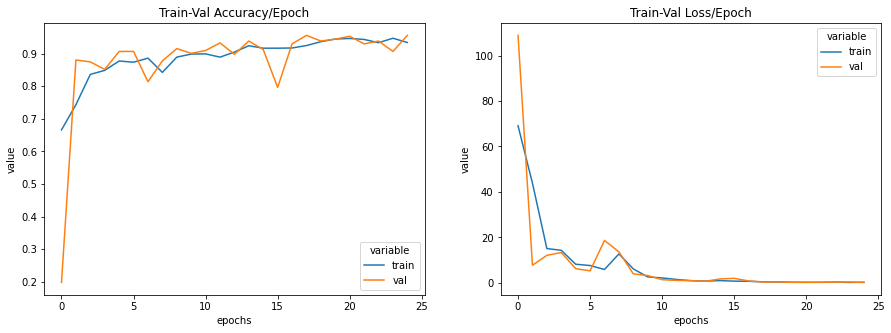

In [5]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Customized_CNN', 
                                                 batch_size = 32,  
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.008, 
                                                 lr_decay = False, 
                                                 num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.62868 | Val Loss: 0.08452 | Train Acc: 0.888| Val Acc: 0.971
Epoch 02: | Train Loss: 0.12276 | Val Loss: 0.10338 | Train Acc: 0.958| Val Acc: 0.962
Epoch 03: | Train Loss: 0.10191 | Val Loss: 0.09582 | Train Acc: 0.965| Val Acc: 0.965
Epoch 04: | Train Loss: 0.10922 | Val Loss: 0.07263 | Train Acc: 0.964| Val Acc: 0.977
Epoch 05: | Train Loss: 0.11844 | Val Loss: 0.06893 | Train Acc: 0.954| Val Acc: 0.977
Epoch 06: | Train Loss: 0.10155 | Val Loss: 0.08127 | Train Acc: 0.963| Val Acc: 0.974
Epoch 07: | Train Loss: 0.10357 | Val Loss: 0.08762 | Train Acc: 0.966| Val Acc: 0.971
Epoch 08: | Train Loss: 0.10641 | Val Loss: 0.06482 | Train Acc: 0.966| Val Acc: 0.980
Epoch 09: | Train Loss: 0.10864 | Val Loss: 0.06243 | Train Acc: 0.964| Val Ac

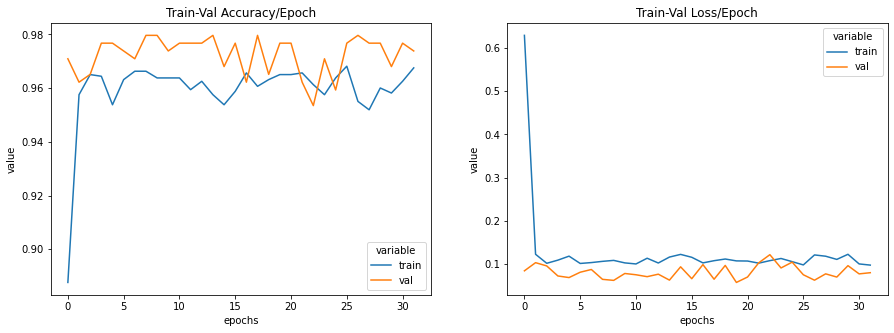

In [9]:
from src.model.binary_classification import binary_classification_models
model = binary_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet50', 
                                                 batch_size = 32, 
                                                 pretrained = False, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.001, 
                                                 lr_decay = True, 
                                                 num_epochs = 32)